In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temperaturas = pd.read_csv('data/dengue_features_train.csv', usecols=['reanalysis_air_temp_k'])
casos = pd.read_csv('data/dengue_labels_train.csv', usecols=['city','total_cases'])

In [3]:
df = pd.concat([casos, temperaturas], axis=1)
df.city = df.city.map(lambda x: {'sj':'San Juan, Puerto Rico','iq':'Iquitos, Peru'}.get(x, '')).astype('category')
df.rename(columns={'total_cases':'casos','reanalysis_air_temp_k':'temperatura','weekofyear':'semana'}, inplace=True)
df

,city,casos,temperatura
0,"San Juan, Puerto Rico",4,297.572857
1,"San Juan, Puerto Rico",5,298.211429
2,"San Juan, Puerto Rico",4,298.781429
3,"San Juan, Puerto Rico",3,298.987143
4,"San Juan, Puerto Rico",6,299.518571
...,...,...,...
1451,"Iquitos, Peru",5,299.334286
1452,"Iquitos, Peru",8,298.330000
1453,"Iquitos, Peru",1,296.598571
1454,"Iquitos, Peru",1,296.345714


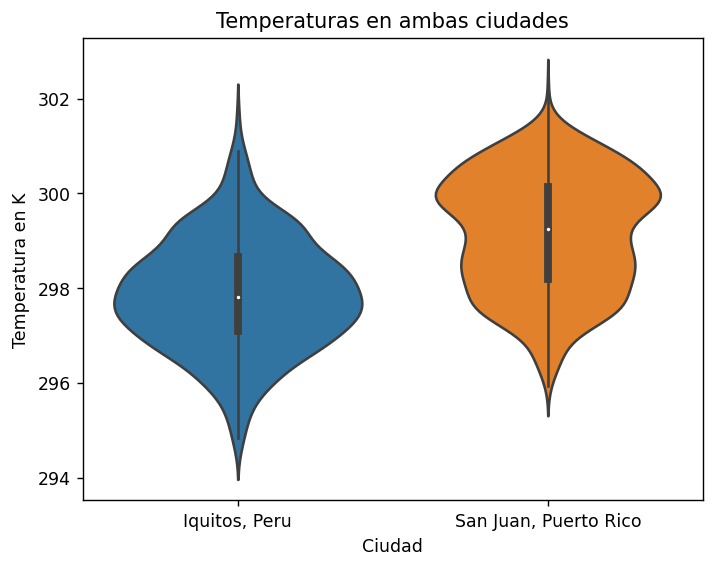

In [4]:
plt.figure(dpi=125)
sns.violinplot(df, x='city', y='temperatura')
plt.title('Temperaturas en ambas ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura en K')
plt.show()

Text(0, 0.5, 'Cantiadd')

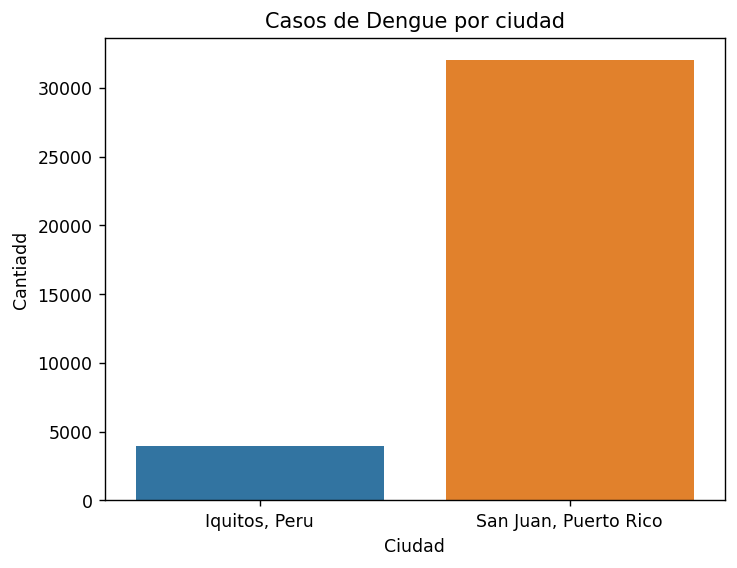

In [5]:
ciudades = df.groupby('city').sum().drop(['temperatura'], axis=1).reset_index()

plt.figure(dpi=125)
sns.barplot(data=ciudades, x='city', y='casos')
plt.title('Casos de Dengue por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantiadd')